# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.427  1  0.863 0.354 0.004   
                             age        0.017  1  0.034 0.854 0.000   
                             Kiel       1.516  1  3.062 0.082 0.016   
                             Magdeburg  4.377  1  8.840 0.003 0.044   
                             Sweden     7.380  1 14.905 0.000 0.072   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.807  1  0.973 0.325 0.005   
                             age        0.984  1  1.185 0.278 0.006   
                             Kiel       0.033  1  0.039 0.843 0.000   
                             Magdeburg  1.011  1  1.218 0.271 0.006   
                             Sweden    21.771  1 26.230 0.000 0.121   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.451  0.515    False  
                             age               0.068  0.915    False  
                             Kiel              1.088  0.178    False  
                             Magdeburg         2.478  0.014     True  
                             Sweden            3.811  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.488  0.487    False  
                             age               0.556  0.435    False  
                             Kiel              0.074  0.908    False  
                             Magdeburg         0.567  0.429    False  
                             Sweden            6.132  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.795  1  4.638 0.033 0.024   
                             age        0.008  1  0.045 0.832 0.000   
                             Kiel       0.452  1  2.640 0.106 0.014   
                             Magdeburg  1.035  1  6.038 0.015 0.031   
                             Sweden     2.495  1 14.559 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.629  1  0.862 0.354 0.004   
                             age        3.130  1  1.656 0.200 0.009   
                             Kiel       9.869  1  5.221 0.023 0.027   
                             Magdeburg 13.889  1  7.347 0.007 0.037   
                             Sweden     1.334  1  0.706 0.402 0.004   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.488  0.081    False  
                             age               0.080  0.894    False  
                             Kiel              0.975  0.206    False  
                             Magdeburg         1.827  0.043     True  
                             Sweden            3.737  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.451  0.507    False  
                             age               0.700  0.333    False  
                             Kiel              1.630  0.062    False  
                             Magdeburg         2.135  0.024     True  
                             Sweden            0.396  0.552    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.354         0.451  0.515    False   
                             age       0.854         0.068  0.915    False   
                             Kiel      0.082         1.088  0.178    False   
                             Magdeburg 0.003         2.478  0.014     True   
                             Sweden    0.000         3.811  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.325         0.488  0.487    False   
                             age       0.278         0.556  0.435    False   
                             Kiel      0.843         0.074  0.908    False   
                             Magdeburg 0.271         0.567  0.429    False   
                             Sweden    0.000         6.132  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.033         1.488  0.081    False  
                             age       0.832         0.080  0.894    False  
                             Kiel      0.106         0.975  0.206    False  
                             Magdeburg 0.015         1.827  0.043     True  
                             Sweden    0.000         3.737  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.354         0.451  0.507    False  
                             age       0.200         0.700  0.333    False  
                             Kiel      0.023         1.630  0.062    False  
                             Magdeburg 0.007         2.135  0.024     True  
                             Sweden    0.402         0.396  0.552    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.481     0.337     0.246         2.735     0.313
std       0.303         5.362     0.330     0.299         5.171     0.327
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.015     0.002         0.359     0.008
50%       0.119         0.923     0.239     0.091         1.039     0.183
75%       0.465         2.426     0.620     0.437         2.711     0.583
max       1.000       149.907     1.000     0.999        86.174     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.354         0.451   
A0A024R0T9;K7ER74;P02655                           AD     0.053         1.279   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.105         0.979   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.481         0.318   
A0A075B6H7                                         AD     0.099         1.006   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.054         1.268   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.265         0.577   
S4R3U6                                             AD     0.325         0.488   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.515    False   
A0A024R0T9;K7ER74;P02655                           AD      0.127    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.218    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.634    False   
A0A075B6H7                                         AD      0.207    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.130    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.422    False   
S4R3U6                                             AD      0.487    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.033         1.488   
A0A024R0T9;K7ER74;P02655                           AD     0.027         1.568   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.337         0.472   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.293         0.534   
A0A075B6H7                                         AD     0.217         0.663   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.077         1.116   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.764         0.117   
S4R3U6                                             AD     0.354         0.451   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.081    False  
A0A024R0T9;K7ER74;P02655                           AD      0.070    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.489    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.442    False  
A0A075B6H7                                         AD      0.356    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.254         1.398     0.336     0.254         1.474     0.327
std       0.292         1.622     0.316     0.295         1.764     0.319
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.012         0.362     0.040     0.010         0.353     0.031
50%       0.120         0.921     0.239     0.110         0.959     0.212
75%       0.435         1.911     0.594     0.443         2.003     0.588
max       1.000        22.364     1.000     0.999        24.088     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1036,1007


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.354         0.451  0.515   
A0A024R0T9;K7ER74;P02655                           0.053         1.279  0.127   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.105         0.979  0.218   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.481         0.318  0.634   
A0A075B6H7                                         0.099         1.006  0.207   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.054         1.268  0.130   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.265         0.577  0.422   
S4R3U6                                             0.325         0.488  0.487   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.033   
A0A024R0T9;K7ER74;P02655                              False 0.027   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.337   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.293   
A0A075B6H7                                            False 0.217   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.077   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.764   
S4R3U6                                                False 0.354   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.488  0.081   
A0A024R0T9;K7ER74;P02655                                   1.568  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.472  0.489   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.534  0.442   
A0A075B6H7                                                 0.663  0.356   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.116  0.159   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.170   
Q9Y6Y9                                                     0.117  0.845   
S4R3U6                                                     0.451  0.507   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    972
PI (yes) - QRILC (yes)   350
PI (no)  - QRILC (yes)    64
PI (yes) - QRILC (no)     35
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.022         1.664  0.064    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.007         2.150  0.025     True   
A0A087WWT2;Q9NPD7                        0.041         1.386  0.105    False   
A0A087X0M8                               0.021         1.688  0.061    False   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.014         1.859  0.044     True   
...                                        ...           ...    ...      ...   
Q9NZR2                                   0.031         1.509  0.084    False   
Q9P0K9                                   0.032         1.500  0.085    False   
Q9UJ14                                   0.066         1.182  0.151    False   
Q9UNW1                                   0.013         1.887  0.042     True   
Q9UQ52                                   0.196         0.708  0.343    False   

                                         QRILC                                \
                                         p-unc -Log10 pvalue qvalue rejected   
protein groups                                                                 
A0A075B6I0                               0.003         2.545  0.011     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2    0.133         0.875  0.245    False   
A0A087WWT2;Q9NPD7                        0.005         2.297  0.017     True   
A0A087X0M8                               0.004         2.384  0.015     True   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2 0.069         1.162  0.146    False   
...                                        ...           ...    ...      ...   
Q9NZR2                                   0.012         1.904  0.037     True   
Q9P0K9                                   0.009         2.024  0.030     True   
Q9UJ14                                   0.012         1.921  0.036     True   
Q9UNW1                                   0.113         0.945  0.218    False   
Q9UQ52                                   0.004         2.383  0.015     True   

                                              data  
                                         frequency  
protein groups                                      
A0A075B6I0                                     194  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2          114  
A0A087WWT2;Q9NPD7                              193  
A0A087X0M8                                     189  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2       176  
...                                            ...  
Q9NZR2                                         145  
Q9P0K9                                         192  
Q9UJ14                                         169  
Q9UNW1                                         171  
Q9UQ52                                         188  

[99 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.515,0.081,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.127,0.070,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.218,0.489,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.634,0.442,196,PI (no) - QRILC (no)
A0A075B6H7,0.207,0.356,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.315,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.130,0.159,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.170,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
J3KSJ8;Q9UD71;Q9UD71-2,0.582,0.040,51,PI (no) - QRILC (yes),0.542
K7EPJ5;O60291;O60291-2;O60291-3;O60291-4,0.007,0.534,50,PI (yes) - QRILC (no),0.526
P21333;P21333-2;Q5HY54,0.042,0.482,132,PI (yes) - QRILC (no),0.441
P36871;P36871-2,0.040,0.475,106,PI (yes) - QRILC (no),0.435
F6SYF8;Q9UBP4,0.407,0.006,196,PI (no) - QRILC (yes),0.401
...,...,...,...,...,...
P09211,0.054,0.035,169,PI (no) - QRILC (yes),0.019
P26572,0.053,0.040,194,PI (no) - QRILC (yes),0.013
K7ERI9;P02654,0.042,0.053,196,PI (yes) - QRILC (no),0.011


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


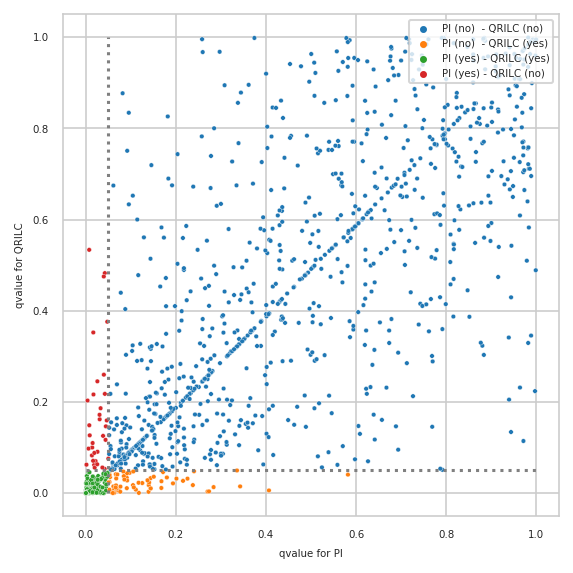

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


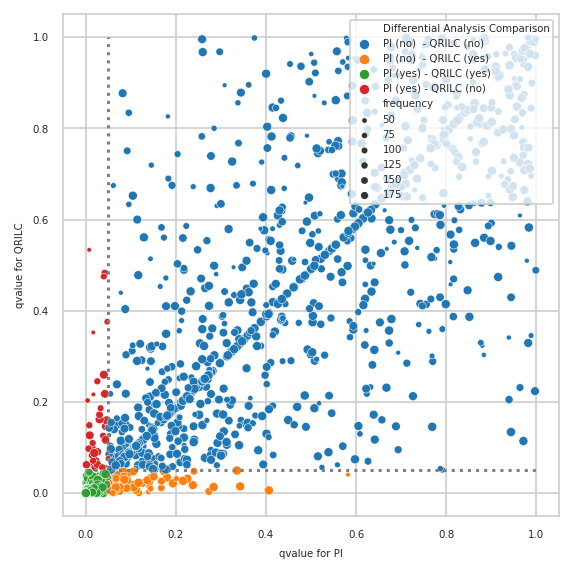

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out